# Grafo Ponderado

In [1]:
# Instalando módulos necessários
!pip install networkx pandas matplotlib

In [2]:
# Importando Bibliotecas necessárias
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Lendo as informações das arestas e dos vértices
edgelist = pd.read_csv('estadios.csv')
nodelist = pd.read_csv('local.csv')

In [4]:
# Criando o grafo
g = nx.Graph()

In [5]:
# Adicionando Nós e ligações
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [6]:
# Adicionando Posicionamento para os nós
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())

In [7]:
# Posicionamento para o plot
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

In [8]:
# Cores para os vértices
edge_colors = [e[2]['attr_dict']['color'] for e in g.edges(data=True)]

In [14]:
# Pesos para as arestas
#edge_labels = [{e[2]['attr_dict']['distance'] for e in g.edges(data=True)}]

edge_labels = nx.get_edge_attributes(g,'attr_dict')
edge_labels

SyntaxError: invalid syntax (<ipython-input-14-de254f57efb6>, line 4)

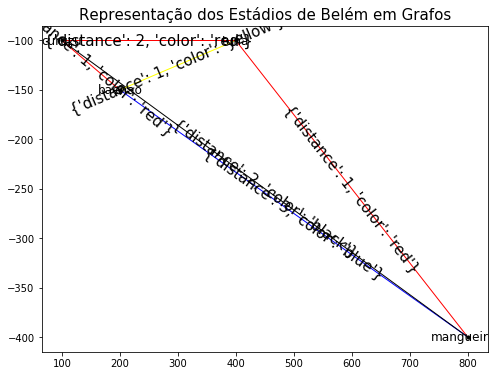

In [11]:
# Plotando o grafo
bbox = {'ec':[1,1,1,0], 'fc':[1,1,1,0]}
plt.figure(figsize=(8, 6))
#nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
nx.draw_networkx(g, edge_color=edge_colors, pos=node_positions, node_size=10, edge_labels=edge_labels, node_color='black', arrowsize=20, with_labels=True)
nx.draw_networkx_edge_labels(g, pos=node_positions, edge_labels=edge_labels, bbox=bbox, font_size=15)
plt.title('Representação dos Estádios de Belém em Grafos', size=15)
plt.show()